In [1]:
import numpy as np
import pandas as pd

Get the data

In [3]:
df = pd.read_csv('ml-latest-small/ratings.csv')

In [4]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


getting movie title names

In [5]:
movie_titles = pd.read_csv("ml-latest-small/movies.csv")
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movie_titles = movie_titles.drop('genres', axis=1)

In [8]:
movie_titles.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [9]:
df = pd.merge(df, movie_titles, on="movieId")
df.head()

,userId,movieId,rating,timestamp,title
0,1,1,4.0,964982703,Toy Story (1995)
1,1,3,4.0,964981247,Grumpier Old Men (1995)
2,1,6,4.0,964982224,Heat (1995)
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,964982931,"Usual Suspects, The (1995)"


**Data visulation**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [12]:
df.groupby('title')["rating"].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                                                         5.0
Zeitgeist: Moving Forward (2011)                                               5.0
Dream of Light (a.k.a. Quince Tree Sun, The) (Sol del membrillo, El) (1992)    5.0
Dragons: Gift of the Night Fury (2011)                                         5.0
12 Angry Men (1997)                                                            5.0
Name: rating, dtype: float64

to see the max rating for the film

In [15]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [19]:
ratings = pd.DataFrame(df.groupby('title')["rating"].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [21]:
ratings['no of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,no of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


Histogram represntation of our data

<Axes: >

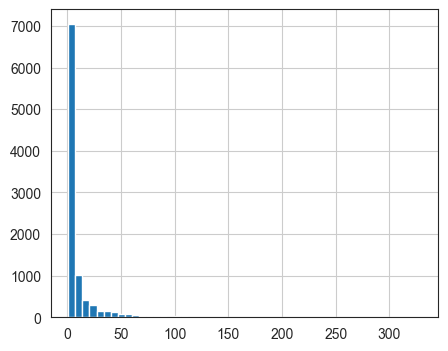

In [30]:
plt.figure(figsize=(5,4))
ratings['no of ratings'].hist(bins=50)

<Axes: >

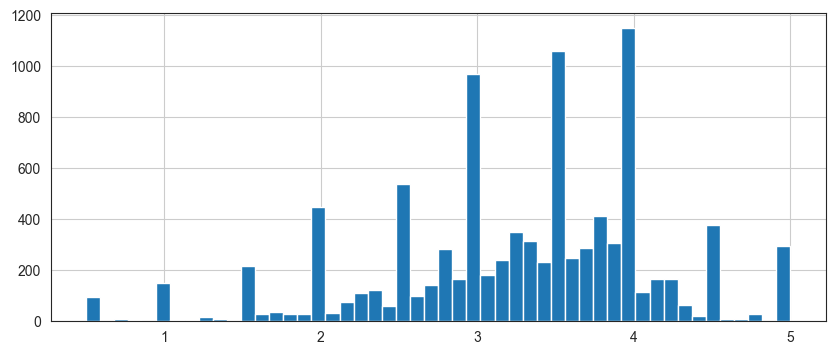

In [31]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=50)

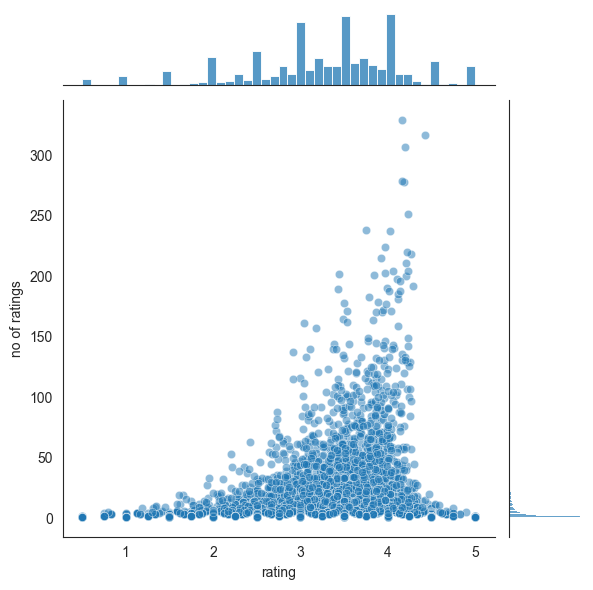

In [32]:
sns.jointplot(x = 'rating', y = 'no of ratings',data=ratings,alpha = 0.5)

 **recommending similar movies**

we're gonna create a table with each cell has the rating the user given to the movies. We will encounter many NaN values, as it is not possible that all users has seen all the movies listed in our dataset.

In [33]:
MovieMatrix = df.pivot_table(index='userId', columns='title', values='rating')

In [34]:
MovieMatrix.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


ratings - table we already created, let us sort the table based on 'no of ratings'

In [36]:
ratings.sort_values('no of ratings', ascending = True).head(10)

,rating,no of ratings
title,,
12 Chairs (1971),4.5,1
12 Chairs (1976),5.0,1
Zelary (2003),4.0,1
Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),4.0,1
Zeus and Roxanne (1997),1.0,1
Zipper (2015),2.0,1
Zombie Strippers! (2008),0.5,1
Zone 39 (1997),2.0,1
"11th Hour, The (2007)",4.0,1


In [38]:
ratings.sort_values('no of ratings', ascending = False).head(10)

,rating,no of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [39]:
PulpFiction_UserRatings = MovieMatrix['Pulp Fiction (1994)']
Matrix_UserRatings = MovieMatrix['Matrix, The (1999)']

In [41]:
PulpFiction_UserRatings.head(10)

userId
1     3.0
2     NaN
3     NaN
4     1.0
5     5.0
6     2.0
7     NaN
8     4.0
9     NaN
10    1.0
Name: Pulp Fiction (1994), dtype: float64

In [43]:
Matrix_UserRatings.head(10)

userId
1     5.0
2     NaN
3     NaN
4     1.0
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    0.5
Name: Matrix, The (1999), dtype: float64

As we said we encountered some NaN values in the ratings table

Let us Correlate the UserRatings table with the MovieMatrix table wrt userId

.corrwith() function in pandas is a tool used to compute pairwise correlation between matching columns or rows of two DataFrames or Series.

In [44]:
similar_to_PulpFiction = MovieMatrix.corrwith(PulpFiction_UserRatings)
similar_to_Matrix = MovieMatrix.corrwith(Matrix_UserRatings)

C:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [45]:
similar_to_PulpFiction

title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                             -0.148377
xXx (2002)                                   0.019162
xXx: State of the Union (2005)               0.559017
¡Three Amigos! (1986)                       -0.029879
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

In [47]:
similar_to_Matrix

title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                             -0.049146
xXx (2002)                                   0.495251
xXx: State of the Union (2005)               0.383482
¡Three Amigos! (1986)                       -0.006953
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

If two movies are rated similarly by the same users, their correlation will be high.
If the ratings differ a lot, the correlation will be low or negative.

range of corr value = [-1,1]

In [48]:
corr_matrix = pd.DataFrame(similar_to_Matrix, columns=['Corr value'])

Let us clean the table by removing all the NaN values

In [49]:
corr_matrix.dropna(inplace = True)
corr_matrix.head()

,Corr value
title,
"'burbs, The (1989)",-0.160843
(500) Days of Summer (2009),0.302316
*batteries not included (1987),0.392232
...And Justice for All (1979),0.654654
10 Cent Pistol (2015),-1.000000


let's sort the correlation table

In [50]:
corr_matrix.sort_values('Corr value', ascending = False).head(10)

,Corr value
title,
It Might Get Loud (2008),1.0
The Purge: Election Year (2016),1.0
Belly (1998),1.0
The Ridiculous 6 (2015),1.0
The Skeleton Twins (2014),1.0
The Spectacular Now (2013),1.0
The Square (2017),1.0
Zombeavers (2014),1.0
You're Next (2011),1.0


Filter out the movies which has less than 100 user rating. We do this for a strong user recommendation

In [51]:
corr_matrix = corr_matrix.join(ratings['no of ratings'])
corr_matrix.head(10)

,Corr value,no of ratings
title,,
"'burbs, The (1989)",-0.160843,17
(500) Days of Summer (2009),0.302316,42
*batteries not included (1987),0.392232,7
...And Justice for All (1979),0.654654,3
10 Cent Pistol (2015),-1.000000,2
10 Cloverfield Lane (2016),0.637813,14
10 Items or Less (2006),1.000000,3
10 Things I Hate About You (1999),0.166496,54
"10,000 BC (2008)",0.205960,17


In [52]:
corr_matrix[corr_matrix['no of ratings']>100].sort_values('Corr value', ascending = False).head(10)

,Corr value,no of ratings
title,,
"Matrix, The (1999)",1.000000,278
Die Hard (1988),0.544466,145
Inception (2010),0.514767,143
Braveheart (1995),0.496045,237
Aliens (1986),0.470865,126
"Lion King, The (1994)",0.444932,172
"Monsters, Inc. (2001)",0.441205,132
Batman Begins (2005),0.440338,116
Jurassic Park (1993),0.427936,238


These are all the movie which are recommandable to a user who watched the movie 'Matrix (1999)'

let us to the same for the movie 'Pulp Fiction (1994)'

In [53]:
PulpFiction_UerRatings = MovieMatrix['Pulp Fiction (1994)']
PulpFiction_UserRatings.head(10)

userId
1     3.0
2     NaN
3     NaN
4     1.0
5     5.0
6     2.0
7     NaN
8     4.0
9     NaN
10    1.0
Name: Pulp Fiction (1994), dtype: float64

In [54]:
similar_to_PulpFiction = MovieMatrix.corrwith(PulpFiction_UserRatings )

C:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [57]:
similar_to_PulpFiction

title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                             -0.148377
xXx (2002)                                   0.019162
xXx: State of the Union (2005)               0.559017
¡Three Amigos! (1986)                       -0.029879
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

In [60]:
corr_PF = pd.DataFrame(similar_to_PulpFiction, columns=['Corr values'])
corr_PF.head(10)

,Corr values
title,
'71 (2014),NaN
'Hellboy': The Seeds of Creation (2004),NaN
'Round Midnight (1986),NaN
'Salem's Lot (2004),NaN
'Til There Was You (1997),NaN
'Tis the Season for Love (2015),NaN
"'burbs, The (1989)",-0.187323
'night Mother (1986),NaN
(500) Days of Summer (2009),-0.044034


In [63]:
corr_PF.dropna(inplace=True)
corr_PF.head(10)

,Corr values
title,
"'burbs, The (1989)",-0.187323
(500) Days of Summer (2009),-0.044034
*batteries not included (1987),-0.738549
...And Justice for All (1979),-0.188982
10 Cent Pistol (2015),1.000000
10 Cloverfield Lane (2016),-0.201347
10 Things I Hate About You (1999),-0.126206
"10,000 BC (2008)",-0.409514
101 Dalmatians (1996),0.289800


In [64]:
corr_PF.sort_values('Corr values', ascending = False).head(10)

,Corr values
title,
10 Cent Pistol (2015),1.0
2 Guns (2013),1.0
Max Dugan Returns (1983),1.0
Chasers (1994),1.0
Written on the Wind (1956),1.0
Meet the Spartans (2008),1.0
"Maxed Out: Hard Times, Easy Credit and the Era of Predatory Lenders (2006)",1.0
Twisted (2004),1.0
Gross Anatomy (a.k.a. A Cut Above) (1989),1.0


In [65]:
corr_PF = corr_PF.join(ratings['no of ratings'])

In [66]:
corr_PF.head(10)

,Corr values,no of ratings
title,,
"'burbs, The (1989)",-0.187323,17
(500) Days of Summer (2009),-0.044034,42
*batteries not included (1987),-0.738549,7
...And Justice for All (1979),-0.188982,3
10 Cent Pistol (2015),1.000000,2
10 Cloverfield Lane (2016),-0.201347,14
10 Things I Hate About You (1999),-0.126206,54
"10,000 BC (2008)",-0.409514,17
101 Dalmatians (1996),0.289800,47


In [67]:
corr_PF.sort_values('no of ratings', ascending = False).head(10)

,Corr values,no of ratings
title,,
Forrest Gump (1994),0.077001,329
"Shawshank Redemption, The (1994)",0.131893,317
Pulp Fiction (1994),1.000000,307
"Silence of the Lambs, The (1991)",0.345282,279
"Matrix, The (1999)",0.330602,278
Star Wars: Episode IV - A New Hope (1977),0.041311,251
Jurassic Park (1993),-0.086327,238
Braveheart (1995),0.092270,237
Terminator 2: Judgment Day (1991),0.089894,224


In [69]:
corr_PF[corr_PF['no of ratings']>100].sort_values('Corr values', ascending = False).head(10)

,Corr values,no of ratings
title,,
Pulp Fiction (1994),1.000000,307
Fight Club (1999),0.543465,218
Kill Bill: Vol. 1 (2003),0.504147,131
Trainspotting (1996),0.437714,102
Kill Bill: Vol. 2 (2004),0.421685,110
"Usual Suspects, The (1995)",0.411700,204
"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",0.402193,120
Eternal Sunshine of the Spotless Mind (2004),0.401534,131
Reservoir Dogs (1992),0.394687,131


these are all the movies which will be recommended to the users who watched the movie 'Pulp Fiction (1994)'